In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


In [3]:
# Download stock data for Apple (AAPL)
data = yf.download("AAPL", start="2020-01-01", end="2024-12-31")

# Show the first 5 rows
data.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.716064,72.776591,71.466805,71.721011,135480400
2020-01-03,72.009117,72.771745,71.783962,71.941328,146322800
2020-01-06,72.582901,72.621639,70.876068,71.127858,118387200
2020-01-07,72.241539,72.849216,72.021223,72.592586,108872000
2020-01-08,73.403648,73.706279,71.943759,71.943759,132079200


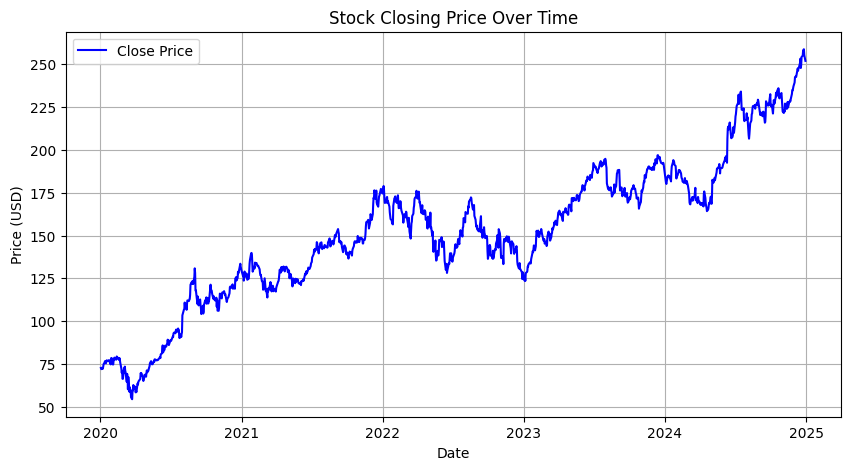

In [5]:
plt.figure(figsize=(10,5))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# Create a column with the previous day's closing price
data['Prev_Close'] = data['Close'].shift(1)

# Drop the first row (it will have NaN in Prev_Close)
data.dropna(inplace=True)

# View the new structure
data.head()


Price,Close,High,Low,Open,Volume,Prev_Close
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2020-01-03,72.009117,72.771745,71.783962,71.941328,146322800,72.716064
2020-01-06,72.582901,72.621639,70.876068,71.127858,118387200,72.009117
2020-01-07,72.241539,72.849216,72.021223,72.592586,108872000,72.582901
2020-01-08,73.403648,73.706279,71.943759,71.943759,132079200,72.241539
2020-01-09,74.962784,75.156464,74.132368,74.384151,170108400,73.403648


In [7]:
# Feature: Previous day's close
X = data[['Prev_Close']]

# Target: Today's close
y = data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [8]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 8.50


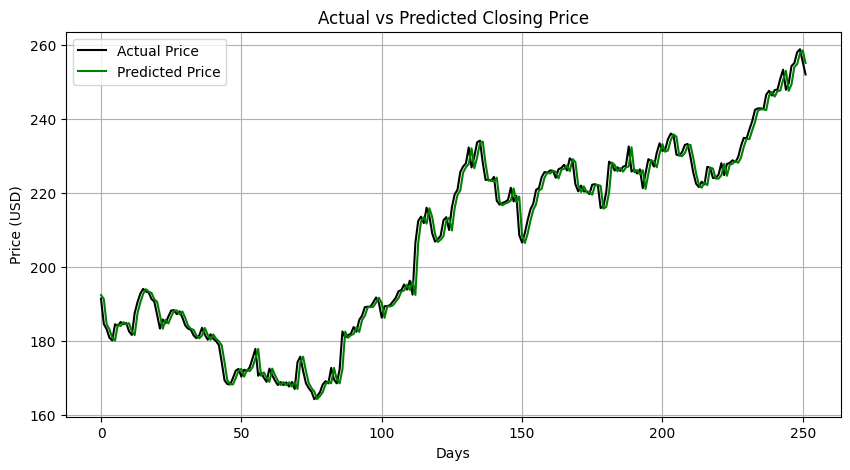

In [9]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual Price', color='black')
plt.plot(predictions, label='Predicted Price', color='green')
plt.title('Actual vs Predicted Closing Price')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
# Make sure latest_close is a single float
latest_close = data['Close'].values[-1].item()

print(f"Latest Closing Price: {latest_close:.2f}")

# Predict next day’s price
next_day_prediction = model.predict([[latest_close]])[0].item()

print(f"Predicted Next Closing Price: {next_day_prediction:.2f}")


Latest Closing Price: 251.92
Predicted Next Closing Price: 251.63


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Errors
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")



Model Evaluation:
Mean Absolute Error (MAE): 2.16
Mean Squared Error (MSE): 8.50
Root Mean Squared Error (RMSE): 2.92
R² Score: 0.9869
